# Геометрическое распределение

**Обозначение:** Geom($p$) <br>
**Параметры:** $p$ - вероятность "успеха" в опыте Бернулли <br>
**Функция вероятности:** $\Pr(X=k) = (1-p)^{1-k}p$ или $\Pr(X=k) = (1-p)^{k}p$<br>
**Интуиция:** геометрическое распределение показывает вероятность того, что понадобится $k$ опытов Бернулли до выпадения первого успеха. В одном определении этого распределения порядковый номер первого выпавшего успеха включается в $k$, а в другом - нет, то есть в первом $k$ состоит из $k-1$ неудач и одного успеха, а во втором $k$ состоит из $k$ неудач, а следующий опыт будет успехом.

**Важно:** поскольку в сердце геометрического распределения лежит опыт Бернулли, важно, чтобы опыты в серии происходили независимо друг от друга, то есть выпадение неудачи никак не влияло на вероятность выпадения успеха. То есть здесь успех и неудача должны вытягиваться с заменой, как буквы из алфавита {0, 1} при составлении слова длиной в k букв. Если мы имеем со случаем вытягивания без замены, то есть выпадение одного исхода меняет вероятность выпадения других исходов, то геометрическое распределение здесь не подходит! <br>
Пример такой ситуации - вытягивание 5 шариков из корзинки с 6 красными и 14 жёлыми шариками. До эксперимента вероятности вытягивания первого шарика таковы: красный - $6/20$, жёлтый - $14/20$. Допустим, мы вытянули красный шарик. В корзинке осталось 19 шариков, и теперь вероятности поменялись: красный - $5/19\neq{5/20}$, жёлтый $14/19\neq{14/20}$, то есть оба значения вероятности поменялись. Выпадение красного шарика дало нам информацию о возможном выпадении других шариков. Здесь геометрическое распределение не подойдёт! Опыты проводятся не независимо, т.е. исход каждого опыта даёт нам информацию о вероятностях будущих опытов! <br>

В экстремальном случае - у нас есть 1 красный и 4 жёлтых шарика, в этом случае выпадение красного шарика сразу же подбрасывает до единицы вероятность выпадения жёлтого шарика в любом количестве последующих опытов.

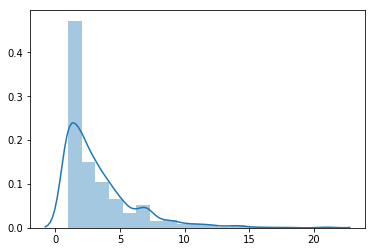

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

P = 0.3
NUM_EXPERIMENTS = 1000


# Сформулируем единичный опыт Бернулли:
def bernoulli_trial(proba):
    # Вероятность указывать в [0, 1]
    return True if np.random.rand() < proba else False

# Начнём проводить серии из единичных опытов Бернулли до тех пор, пока не выпадет первый успех,
# и записывать результаты в отдельный массив. После этого мы рассмотрим распределение этого
# массива - оно и будет представлять собой Геометрическое распределение.
outcomes_list = []
for _ in range(NUM_EXPERIMENTS):
    trials_counter = 0
    first_success = False
    while not first_success:
        trials_counter += 1
        first_success = bernoulli_trial(P)
    outcomes_list.append(trials_counter)

# Отобразим получившееся распределение на графике:    
plt.clf()
sns.distplot(outcomes_list, kde = True, bins = np.unique(outcomes_list).shape[0])
plt.show()

Проведя эксперимент множество раз, проверим экспериментально вероятность того, что нам понадобится 6 экспериментов до первого успеха (включительно). Для этого начнём проводить серии из экспериментов Бернулли и фиксировать те и только те случаи, когда первый успех выпал после пяти неудач. Это будет $m_A$. Затем разделим это число на количество проведённых экспериментов $n$, и таким образом получим искомое значение вероятности.

In [2]:
NUM_EXPERIMENTS = 1000000

# six_trials_counter будет инкрементироваться тогда и только тогда, когда мы будем встречать 
# серию опытов Бернулли из 5 неудач подряд и 1 успеха за ними:
six_trials_counter = 0
for _ in range(NUM_EXPERIMENTS):
    # Проведём серию из 6 бросков:
    series = [bernoulli_trial(P) for _ in range(6)]
    # Посчитаем только те случаи, где выпал 1 успех, и он - последний в серии:
    if sum(series) == 1 and series[-1] == True:
        six_trials_counter += 1
    
# Рассчитаем вероятность:
print(six_trials_counter / NUM_EXPERIMENTS)
print('Теоретическое значение = 0.0504')

0.050258
Теоретическое значение = 0.0504
